In [1]:
from ScatterSim.NanoObjects import CylinderNanoObject, PolydisperseNanoObject
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Helper functions
def form_factor_slices(smod, qmax):
    ''' Compute the xy, xz, and yz projections.
    
    '''
    q = np.linspace(-qmax, qmax,100)
    QROWS, QCOLS = np.meshgrid(q,q, indexing="ij")
    Q0 = QROWS*0
    P2_xy = smod.form_factor_squared(np.array([QCOLS, QROWS, Q0]))
    P2_yz = smod.form_factor_squared(np.array([Q0, QCOLS, QROWS]))
    P2_xz = smod.form_factor_squared(np.array([QCOLS, Q0, QROWS]))

    return P2_xy, P2_yz, P2_xz

def show_qslices(F_xy, F_yz, F_xz, height, num=4, **kwargs):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = 2*np.pi/height*np.array([-.5, .5, -.5, .5])
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(F_xy,extent=extent, **kwargs)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(F_yz, extent=extent, **kwargs)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(F_xz,extent=extent, **kwargs)
    

def show_projections(V_xy, V_xz, V_yz, height, num=4):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = [-height/2, height/2., height/2., -height/2.]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)

In [3]:
# Definining a cylinder, two parameters (see each nano object's help doc)
# type "CylinderNanoObject?" in an interactive ipython terminal to see help doc
# (after importing object)
pargs_cyl = {'radius' : 1, 'height' : 1}
cyl = CylinderNanoObject(pargs_cyl)

# Let's now vary the radius in one object, and the height in the other
pargs_polycyl_radius = dict(radius= 1, sigma_R=.04, height=1) # (alternate way of defining dictionaries)
pargs_polycyl_height = dict(radius= 1, height=1, sigma_height=.5) 

polycyl_radius = PolydisperseNanoObject(CylinderNanoObject, pargs_polycyl_radius, argname='radius', argstdname='sigma_R')
polycyl_height = PolydisperseNanoObject(CylinderNanoObject, pargs_polycyl_height, argname='height', argstdname='sigma_height')




# Now choose a q domain for the plotting. The units of q will be the inverse of units you supply
# as parameters to the object. For example, we used nanometers, so q will be in inverse nanometers
q = np.linspace(0, 10, 1000)

# finally, calculate
sq_cyl = cyl.form_factor_squared_isotropic(q)

sq_polycyl_radius = polycyl_radius.form_factor_squared_isotropic(q)
sq_polycyl_height = polycyl_height.form_factor_squared_isotropic(q)

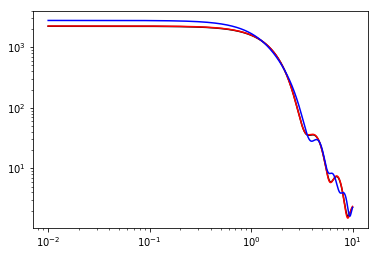

In [4]:
# plot using your favorite plotting library
# In this case, small polydispersity in radius does not affect
# the scattering as much as from the cylinder
# Note : as these are numerical calculations, you will want to 
# increase the 'distribution_num_points' parameter (number of points to sample) 
# until you see convergence of the data. This plot is for instructional purposes only
plt.figure(0);
plt.clf()
plt.loglog(q, sq_cyl,color='k', label="cyl")
plt.loglog(q, sq_polycyl_radius,color='r', label="poly cyl (radius)")
plt.loglog(q, sq_polycyl_height,color='b',label="poly cyl (height)")

In [5]:
# For any object, you can compute the form factor or projection. See functions
# above on how to do it.
# P2 means |P|^2 (form factor squared)
qmax = 10
P2_xy, P2_yz, P2_xz = form_factor_slices(cyl, qmax)
rmax = 1.5
V_xy, V_yz, V_xz = cyl.projections(rmax)

In [6]:
# remember this is a 3D Object. We can look at projections of the object in real space
# or slices of the scattering in Fourier (reciprocal) space 

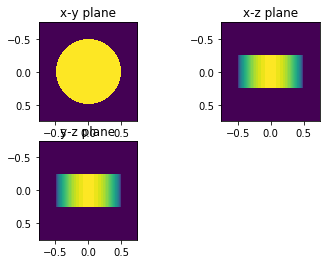

In [7]:
show_projections(V_xy, V_yz, V_xz, rmax, 3)

In [8]:
# Showing the form factors

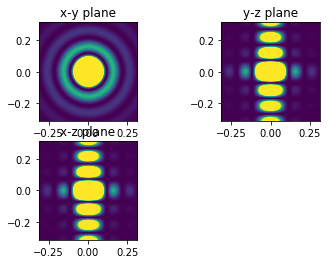

In [9]:
show_qslices(P2_xy, P2_yz, P2_xz, qmax, 2, vmin=0, vmax=6e1)